<a href="https://colab.research.google.com/github/johanarugeles22/Talento_Tech_JohanaRugeles/blob/main/Laboratorio1_TalentoTech_Johana_Rugeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio # 1

### Temas: Limpieza de Datos, análisis de negocio, integración de fuentes de datos

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual de ingresos en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset
*Actividad 18 de junio 2024*

In [45]:
# Importar librerias
import pandas as pd #manipulacion de datos
import matplotlib.pyplot as plt #manipular y graficar datos
import seaborn as sns #graficar datos

In [46]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
ruta = "/content/drive/MyDrive/Colab Notebooks/Data/dataset_banco.csv"
data = pd.read_csv(ruta)

In [48]:
#proporciona visualización y exploración de datos con el dataset cargado
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# **Visualización y Exploración de Datos:**


*   df.head(): Muestra las primeras filas del DataFrame.
*   df.tail(): Muestra las últimas filas del DataFrame.
*   df.info(): Muestra información sobre el DataFrame, incluyendo tipos de datos y valores no nulos.
*   df.describe(): Proporciona estadísticas descriptivas para columnas numéricas.
*   df.shape: Devuelve una tupla con la cantidad de filas y columnas del DataFrame.
*   df.columns: Devuelve una lista con los nombres de las columnas del DataFrame.

## Transformación de nombres de atributos
*Actividad 19 de junio 2024*

In [49]:
#cambia los nombres de las columnas del dataframe
data_rename_2 = data.rename(columns={
                                  'age':        'edad',
                                  'job':        'trabajo',
                                  'marital':    'estado_civil',
                                  'education':  'educacion',
                                  'default':    'morosidad',
                                  'balance':    'saldo',
                                  'housing':    'vivienda',
                                  'loan':       'prestamo',
                                  'contact':    'contacto',
                                  'day':        'dia',
                                  'month':      'mes',
                                  'duration':   'duracion',
                                  'campaign':   'campana',
                                  'pdays':      'dias_previos',
                                  'previous':   'anterior',
                                  'poutcome':   'resultado',
                                  'y':          'respuesta'})
#Verificar cambio
print(data_rename_2.head())

   edad       trabajo estado_civil  educacion morosidad   saldo vivienda  \
0    58    management      married   tertiary        no  2143.0      yes   
1    44    technician       single  secondary        no    29.0      yes   
2    33  entrepreneur      married  secondary        no     2.0      yes   
3    47   blue-collar      married    unknown        no  1506.0      yes   
4    33       unknown       single    unknown        no     1.0       no   

  prestamo contacto  dia  mes  duracion  campana  dias_previos  anterior  \
0       no  unknown    5  may     261.0        1          -1.0         0   
1       no  unknown    5  may     151.0        1          -1.0         0   
2      yes  unknown    5  may      76.0        1          -1.0         0   
3       no  unknown    5  may      92.0        1          -1.0         0   
4       no  unknown    5  may     198.0        1          -1.0         0   

  resultado respuesta  
0   unknown        no  
1   unknown        no  
2   unknown   

In [50]:
#renombrar las columnas #2
data.columns = ['edad',
              'trabajo',
              'estado_civil',
              'educacion',
              'incumplimiento',
              'saldo',
              'vivienda',
              'prestamo',
              'contacto',
              'dia',
              'mes',
              'duracion',
              'campaña',
              'dias_previos',
              'anterior',
              'resultado_prev',
              'respuesta']

print(data.columns)

#validacion de nombres
print(data.shape)
data.head()

Index(['edad', 'trabajo', 'estado_civil', 'educacion', 'incumplimiento',
       'saldo', 'vivienda', 'prestamo', 'contacto', 'dia', 'mes', 'duracion',
       'campaña', 'dias_previos', 'anterior', 'resultado_prev', 'respuesta'],
      dtype='object')
(45215, 17)


,edad,trabajo,estado_civil,educacion,incumplimiento,saldo,vivienda,prestamo,contacto,dia,mes,duracion,campaña,dias_previos,anterior,resultado_prev,respuesta
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
#visualiza las primeras líneas de tu .csv

In [51]:
#visualiza las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   edad            45215 non-null  int64  
 1   trabajo         45213 non-null  object 
 2   estado_civil    45214 non-null  object 
 3   educacion       45214 non-null  object 
 4   incumplimiento  45215 non-null  object 
 5   saldo           45213 non-null  float64
 6   vivienda        45215 non-null  object 
 7   prestamo        45215 non-null  object 
 8   contacto        45215 non-null  object 
 9   dia             45215 non-null  int64  
 10  mes             45215 non-null  object 
 11  duracion        45214 non-null  float64
 12  campaña         45215 non-null  int64  
 13  dias_previos    45214 non-null  float64
 14  anterior        45215 non-null  int64  
 15  resultado_prev  45215 non-null  object 
 16  respuesta       45215 non-null  object 
dtypes: float64(3), int64(4), object

In [52]:
#proporciona estadísticas descriptivas para columnas numéricas
#lo que me va traer al dataset
categoricas = data.select_dtypes(include=['object']).columns.tolist()
numericas = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas categóricas:", categoricas)
print("Columnas numéricas:", numericas)

Columnas categóricas: ['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado_prev', 'respuesta']
Columnas numéricas: ['edad', 'saldo', 'dia', 'duracion', 'campaña', 'dias_previos', 'anterior']


In [53]:
pd.value_counts(data['educacion'])

educacion
secondary    23197
tertiary     13302
primary       6849
unknown       1855
SECONDARY        3
Primary          2
sec.             2
UNK              2
Secondary        1
Tertiary         1
Name: count, dtype: int64

*Actividad 20 de junio 2024*

In [54]:
data.describe()

,edad,saldo,dia,duracion,campaña,dias_previos,anterior
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [56]:
#prompt: contar la extension de letras en la columna educacion
#data['educacion'].apply(len)
# Handle potential float values by converting them to strings first
data['educacion_length'] = data['educacion'].astype(str).apply(len)
print(data['educacion_length'])

0        8
1        9
2        9
3        7
4        7
        ..
45210    8
45211    7
45212    9
45213    9
45214    9
Name: educacion_length, Length: 45215, dtype: int64


## 4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [57]:
#Comando para contar los valores faltantes de mi dataframe
data.isna().sum()

edad                0
trabajo             2
estado_civil        1
educacion           1
incumplimiento      0
saldo               2
vivienda            0
prestamo            0
contacto            0
dia                 0
mes                 0
duracion            1
campaña             0
dias_previos        1
anterior            0
resultado_prev      0
respuesta           0
educacion_length    0
dtype: int64

In [58]:
#elimino los valores faltantes de mi dataframe
data.dropna(inplace=True)

In [59]:
#conteo de valores por columna de mi dataframe
data.count()

edad                45207
trabajo             45207
estado_civil        45207
educacion           45207
incumplimiento      45207
saldo               45207
vivienda            45207
prestamo            45207
contacto            45207
dia                 45207
mes                 45207
duracion            45207
campaña             45207
dias_previos        45207
anterior            45207
resultado_prev      45207
respuesta           45207
educacion_length    45207
dtype: int64

##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

# **for col in cols_cat:**
Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.

print(f'Columna {col}: {data[col].nunique()} subniveles'): Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.

f'Columna {col}: {data[col].nunique()} subniveles': Esta es una cadena de formato (f-string) que contiene dos variables:
{col}: Representa el nombre de la columna actual en la iteración del bucle.
{data[col].nunique()}: Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna.

In [60]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['trabajo', 'estado_civil', 'educacion',
            'incumplimiento', 'vivienda', 'prestamo', 'contacto',
            'mes', 'resultado_prev']
#ciclo for para contar los unicos subniveles por variable categorica con .nunique
for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna trabajo: 18 subniveles
Columna estado_civil: 6 subniveles
Columna educacion: 10 subniveles
Columna incumplimiento: 2 subniveles
Columna vivienda: 2 subniveles
Columna prestamo: 6 subniveles
Columna contacto: 5 subniveles
Columna mes: 12 subniveles
Columna resultado_prev: 6 subniveles


In [61]:
#Conteo los valores
pd.value_counts(data['trabajo'])

trabajo
blue-collar       9730
management        9454
technician        7597
admin.            5166
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

*Actividad 21 de junio 2024*

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

La **desviación estándar** es una medida que nos indica qué tan dispersos o alejados están los valores de un conjunto de datos respecto a su media o promedio. En otras palabras, nos ayuda a entender cuánto varían los valores individuales de un conjunto de datos con respecto a su valor promedio.

Imagina que tienes un conjunto de datos que representa las alturas de estudiantes en una clase. Si la desviación estándar es baja, significa que la mayoría de los estudiantes tienen alturas muy similares entre sí y cercanas a la altura promedio de la clase. Por otro lado, si la desviación estándar es alta, significa que las alturas de los estudiantes están muy dispersas, algunos son muy altos y otros muy bajos en comparación con la altura promedio.

Entonces, la desviación estándar nos da una idea de la dispersión o variabilidad de los datos alrededor de su promedio. Una desviación estándar baja indica que los datos están más agrupados alrededor del promedio, mientras que una desviación estándar alta indica que los datos están más dispersos o separados del promedio.

In [62]:
# Calcular la desviación estándar para las columnas numéricas
desviaciones_estandar = data[['edad', 'saldo', 'dia', 'duracion', 'campaña', 'dias_previos', 'anterior']].std()

# Imprimir las desviaciones estándar
print(desviaciones_estandar)

edad              12.037399
saldo           3924.491665
dia                8.323015
duracion         257.460759
campaña            3.098058
dias_previos     100.103283
anterior           2.303341
dtype: float64


In [63]:
#desviacion estandar para la variable 'dias_previos'
destd_dias_previos = data[['dias_previos']].std()
# Imprimir las desviaciones estándar
print(destd_dias_previos)

dias_previos    100.103283
dtype: float64


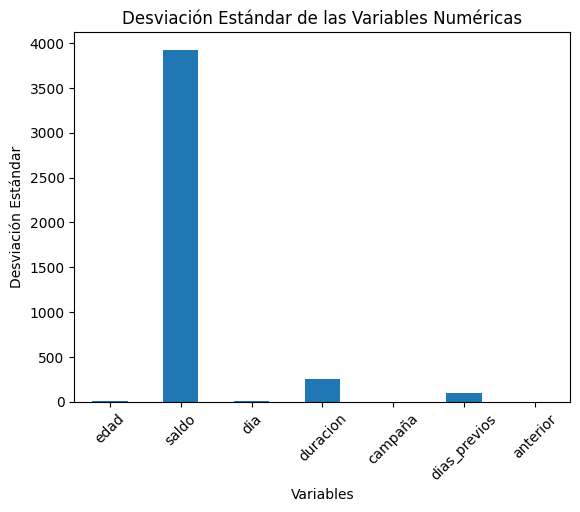

In [64]:
# Crear una gráfica de barras para representar las desviaciones estándar
desviaciones_estandar.plot(kind='bar')
plt.title('Desviación Estándar de las Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Desviación Estándar')
plt.xticks(rotation=45)
plt.show()

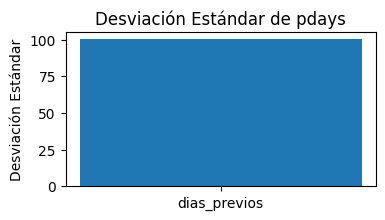

In [65]:
# Graficar la desviación estándar de 'pdays'
plt.figure(figsize=(4, 2))  # Configura el tamaño de la figura
plt.bar('dias_previos', destd_dias_previos)  # Crea una barra para la desviación estándar de 'pdays'
plt.title('Desviación Estándar de pdays')
plt.ylabel('Desviación Estándar')
plt.show()

In [66]:
# Calcula la media del atributo "pdays: dias de contacto al usuario antes de la campaña actual"
media = data['dias_previos'].mean()
print("Promedio de dias de contacto:", media)

Promedio de dias de contacto: 40.17822461123277


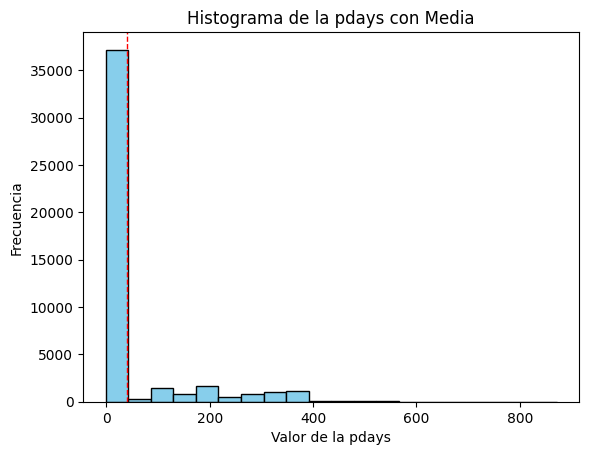

In [67]:
# Graficar un histograma del atributo "pdays"
plt.hist(data['dias_previos'], bins=20, color='skyblue', edgecolor='black')

# Agregar una línea vertical para mostrar la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y título
plt.xlabel('Valor de la pdays')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con Media')

# Mostrar la gráfica
plt.show()

*Actividad 24 de junio 2024*
##4.3 Filas repetidas

In [68]:
#Mostramos la cantidad de registros antes de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
#Mostramos la cantidad de registros después de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 18)
Tamaño del set después de eliminar las filas repetidas: (45203, 18)


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

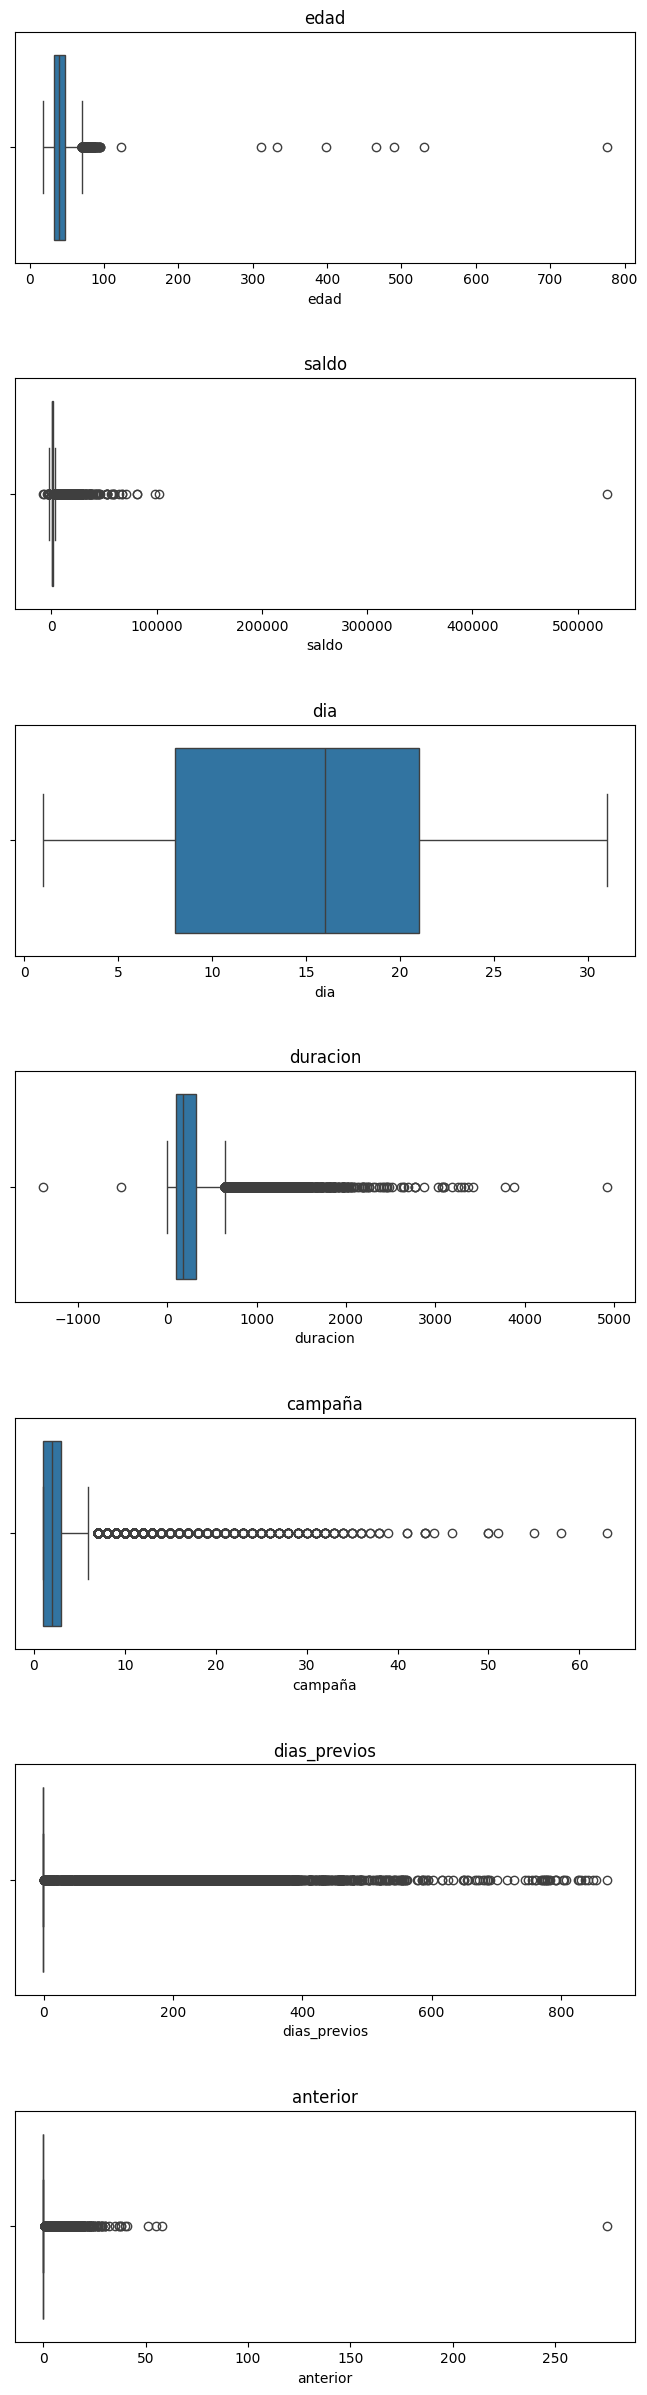

In [69]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['edad', 'saldo', 'dia', 'duracion',
            'campaña', 'dias_previos', 'anterior']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**
- "age": hay sujetos con edades mucho mayores a 100 años
- "duration": hay valores negativos
- "previous": hay un valor extremadamente alto (cercano a 300)

In [70]:
# Eliminar filas con "age">100
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['edad'] > 100].index)
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45203, 18)
Tamaño del set después de eliminar registros de edad: (45195, 18)


In [71]:
# Eliminar filas con "duration"<0
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data.drop(data[data['duracion'] < 0].index)
#data = data[data['duration']>0]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (45195, 18)
Tamaño del set después de eliminar registros de duración: (45193, 18)


##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

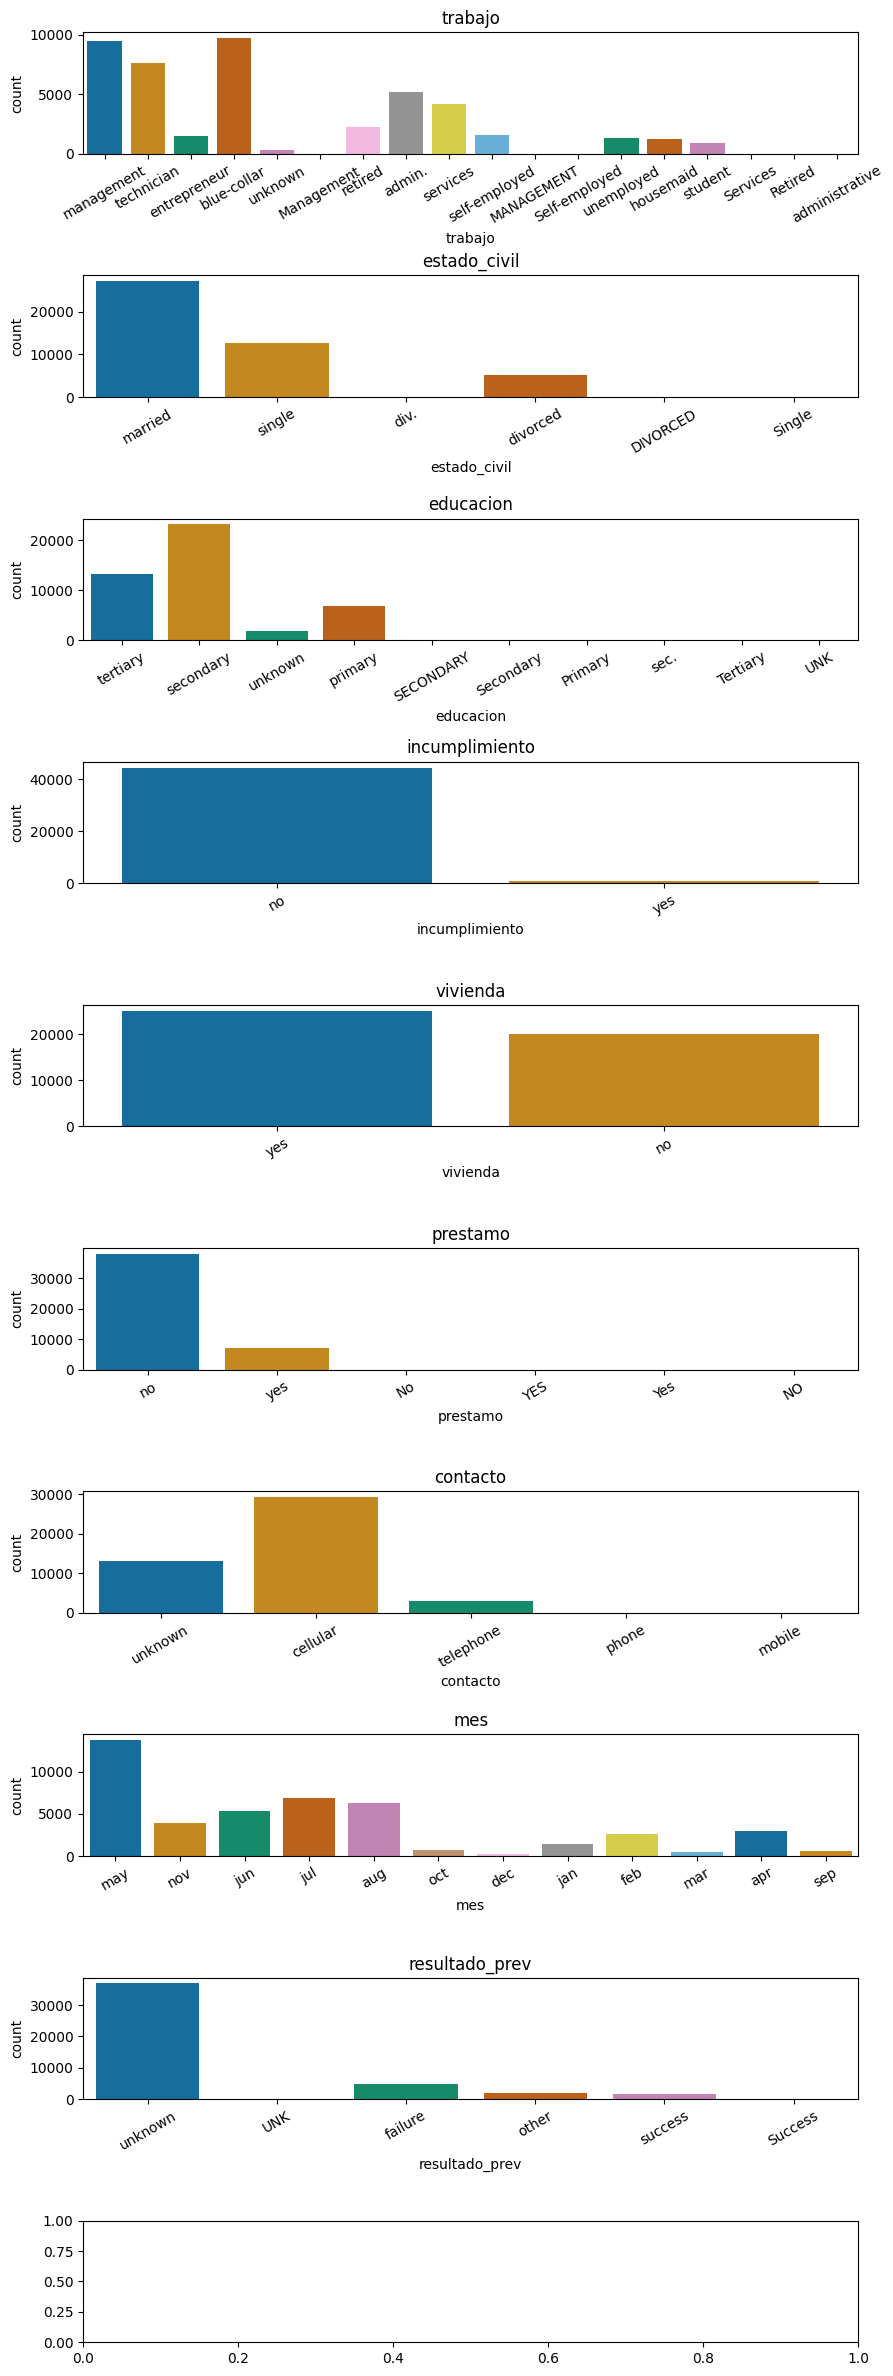

In [72]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['trabajo', 'estado_civil', 'educacion',
            'incumplimiento', 'vivienda', 'prestamo', 'contacto',
            'mes', 'resultado_prev']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette= 'colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

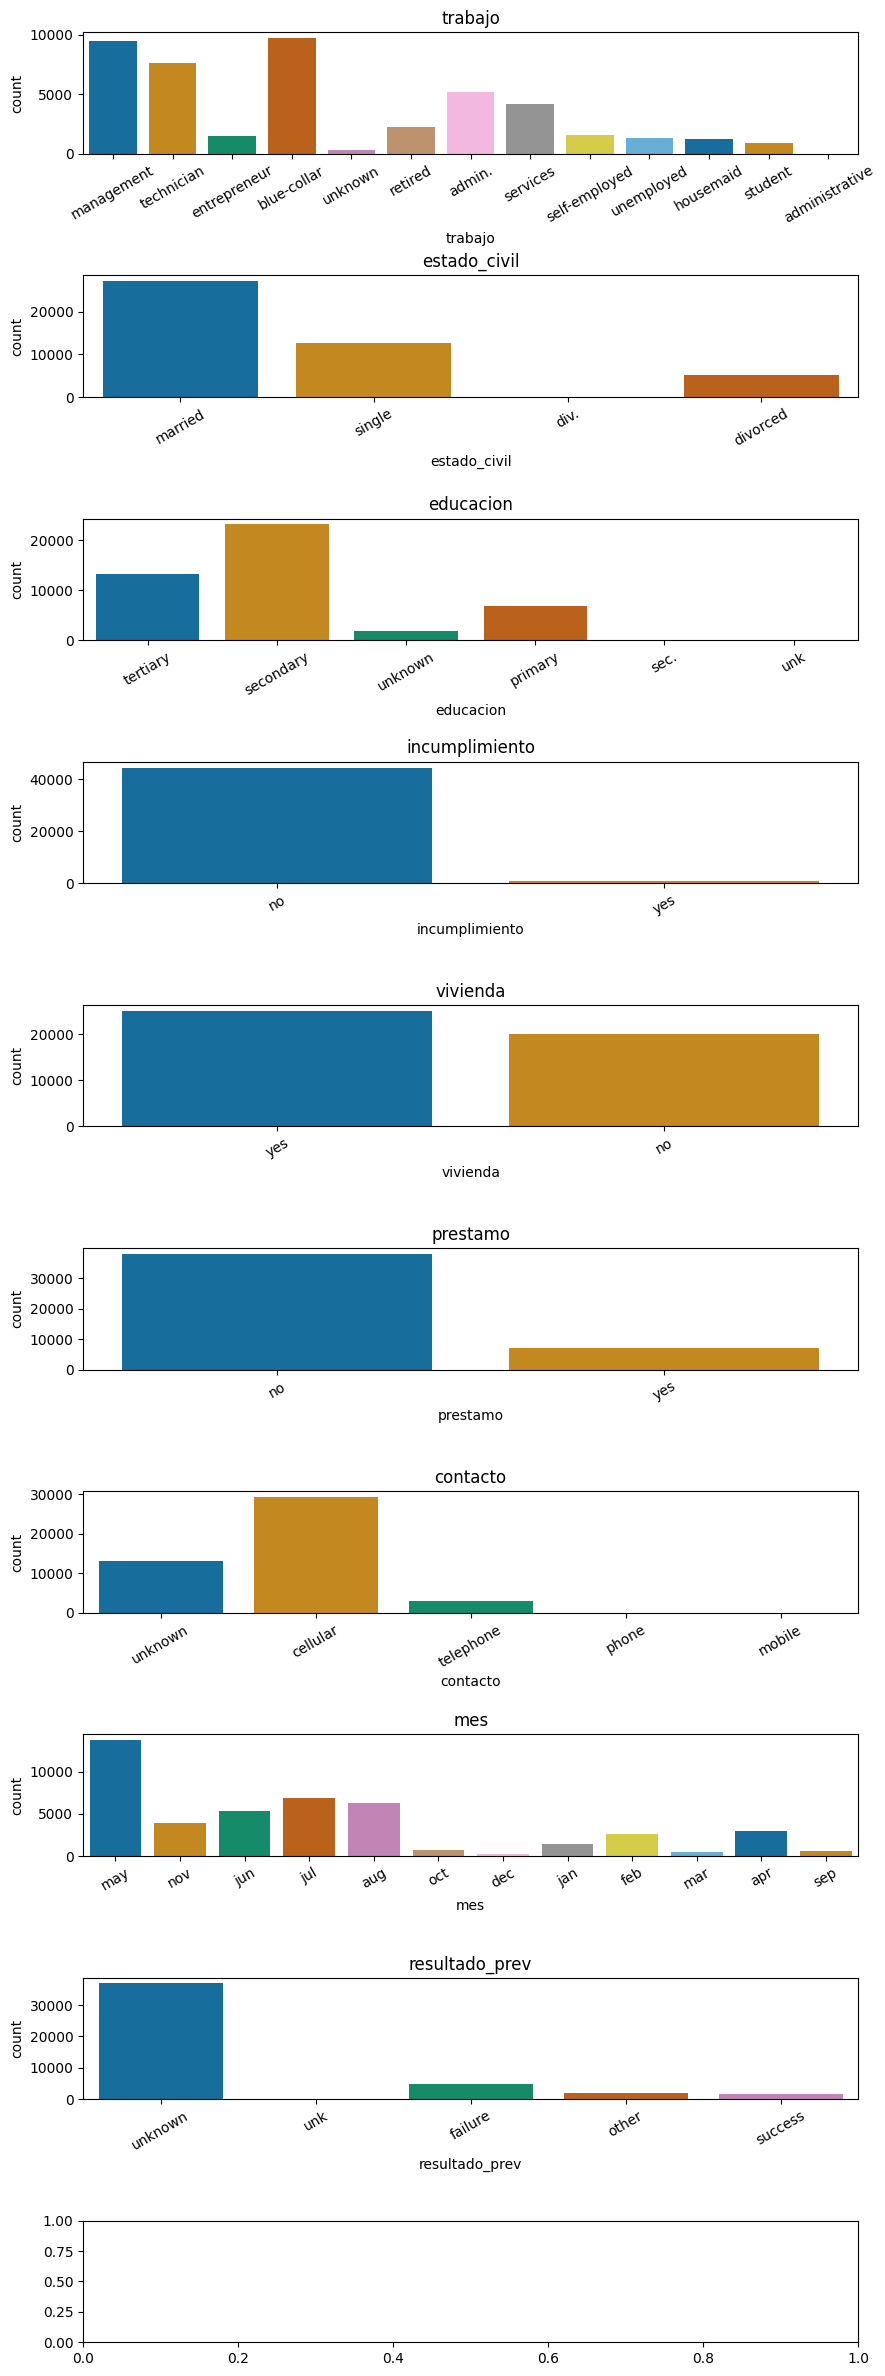

In [73]:
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette='colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

In [ ]:
#'trabajo', 'estado_civil', 'educacion','incumplimiento', 'vivienda', 'prestamo', 'contacto','mes', 'resultado_prev'

In [74]:
# job: unificar admin. y administrative
print(data['trabajo'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']


In [75]:
data['trabajo'] = data['trabajo'].str.replace('admin.','administrative', regex=False)
print(data['trabajo'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [76]:
# marital: unificar div. y divorced
print(data['estado_civil'].unique())
data['estado_civil'] = data['estado_civil'].str.replace('div.','divorced', regex=False)
print(data['estado_civil'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [77]:
# education: unificar sec. y secondary, unk y unknown
print(data['educacion'].unique())
data['educacion'] = data['educacion'].str.replace('sec.','secondary', regex=False)
data.loc[data['educacion']=='unk','educacion'] = 'unknown'
print(data['educacion'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [79]:
# contact: unificar telephone y phone
print(data['contacto'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']


In [81]:
data.loc[data['contacto']=='phone','contacto'] = 'telephone'
data.loc[data['contacto']=='mobile','contacto'] = 'cellular'
print(data['contacto'].unique())

['unknown' 'cellular' 'telephone']


In [82]:
# poutcome: unificar unk y unknown
print(data['resultado_prev'].unique())
data.loc[data['resultado_prev']=='unk','resultado_prev']='unknown'
print(data['resultado_prev'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [83]:
data.shape

(45193, 19)